In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    df.to_csv('pca-dataset.csv', index=False)
    
generate_data()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [6]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Question 1

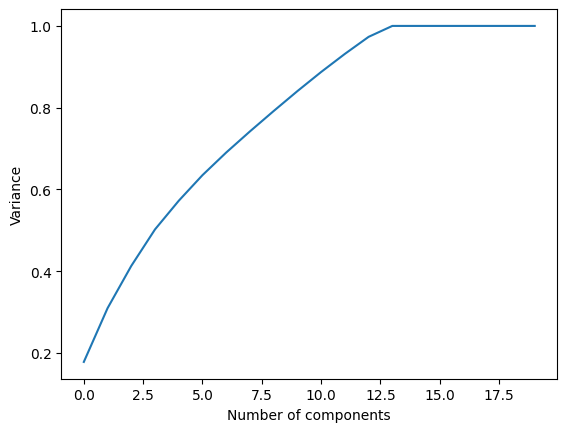

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

s = StandardScaler()
X_train_scale = s.fit_transform(X_train)

pca = PCA()
pca.fit(X_train_scale)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.show()

#### So, the ideal number of components is visible on the graph as the area just before it hits a variance of 1. This can be ~ 8-11 components

### Question 2

In [8]:
df["target"].value_counts()

0.0    744
2.0    380
1.0    376
Name: target, dtype: int64

#### We can see that the data is unbalanced, and so the best metric for this would be precision and recall, and not accuracy

### Question 3 - Logistic Regression without PCA

In [9]:
#without PCA
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_training)

y_pred = lr.predict(X_test)

from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)

Precision:  0.7040254342431762
Recall:  0.7033333333333334


Both the precision and recall are similar, at around 0.70 This could indicate that our False Positives and False Negatives are very similar in value

### Question 4 - Logistic Regression with PCA 

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('logreg', LogisticRegression())
])

params = {
    'pca__n_components': [6, 8, 10, 12]
}

grid = GridSearchCV(pipeline, params, cv=5)
grid.fit(X_train, y_training)

print(f"The best parameters are: {grid.best_params_}")

y_pred = grid.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Best parameters: {'pca__n_components': 12}
Accuracy:  0.7
Precision:  0.6980734649122807
Recall:  0.7


From this, we can observe that the best number of parameters is 12, however even when using this, the score is the same as before

### Question 5 - Decision Tree without PCA

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_training)

y_pred = dt.predict(X_test)
print('Test Accuracy: ',accuracy_score(y_test, y_pred))
print('Test Precision: ',precision_score(y_test, y_pred, average="weighted"))
print('Test Recall: ',recall_score(y_test, y_pred, average="weighted"))

Test Accuracy:  0.6633333333333333
Test Precision:  0.6793031968031967
Test Recall:  0.6633333333333333


From thie results here, we can observe that the decision tree model does not perform as well as the LR model without PCA. Let us see how PCA may possibly improve this score

### Question 6 - Decision Tree with PCA

In [17]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('dt', DecisionTreeClassifier())
])


params = {
    'pca__n_components': [6, 8, 10, 12]
}

grid = GridSearchCV(pipe, params, cv=5)
grid.fit(X_train, y_training)

print(f"The best parameters are: {grid.best_params_}")

y_pred = grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

The best parameters are: {'pca__n_components': 6}
Accuracy:  0.6766666666666666
Precision:  0.6811090383734888
Recall:  0.6766666666666666


Here, we see that the ideal number of components in PCA went down to just 6, and we were able to improve the score of Decision Tree by a bit after performing PCA, however it still is not as good as LR